## Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing dataset

In [42]:
df = pd.read_csv('Social_Network_Ads.csv')
print(df)
x = df.iloc[:,0:-2].values
# print(x)
y = df.iloc[:,1:-1].values
# print(y)

     Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
395   46            41000          1
396   51            23000          1
397   50            20000          1
398   36            33000          0
399   49            36000          1

[400 rows x 3 columns]


In [115]:
df.describe()
df.head(15)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
5,27,58000,0
6,27,84000,0
7,32,150000,1
8,25,33000,0
9,35,65000,0


## Training the Linear Regression model on the whole dataset

In [43]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)

LinearRegression()

## Training the Polynomial Regression model on the whole dataset

In [79]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
x_poly = poly_reg.fit_transform(x)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly, y)

LinearRegression()

## Visualising the Linear Regression results

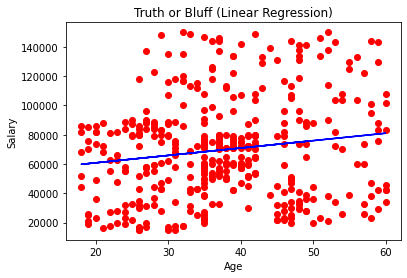

In [80]:
plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg.predict(x), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results

In [119]:
# plt.scatter(x, y, color = 'red')
# plt.plot(x, lin_reg_2.predict(poly_reg.fit_transform(x)), color = 'blue')
# plt.title('Truth or Bluff (Polynomial Regression)')
# plt.xlabel('Age')
# plt.ylabel('Salary')
# plt.show()

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

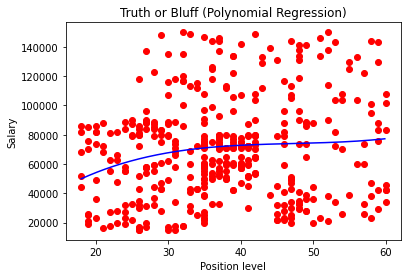

In [82]:
x_grid = np.arange(min(x), max(x), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x, y, color = 'red')
plt.plot(x_grid, lin_reg_2.predict(poly_reg.fit_transform(x_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Predicting a new result with Linear Regression

In [83]:
lin_reg.predict([[37]])

array([[69411.76924714]])

## Predicting a new result with Polynomial Regression

In [84]:
lin_reg_2.predict(poly_reg.fit_transform([[37]]))

array([[71873.64730754]])

# Training the Decision Tree Regression model

In [85]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(x, y)

DecisionTreeRegressor(random_state=0)

## Visualising the Decision Tree Regression results

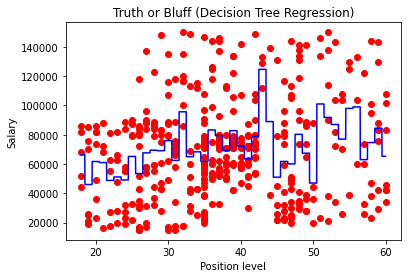

In [87]:
x_grid = np.arange(min(x), max(x), 0.01)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x, y, color = 'red')
plt.plot(x_grid, regressor.predict(x_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Predicting a new result with decision tree

In [88]:
regressor.predict([[37]])

array([79400.])

# Support Vector Regression (SVR)

In [91]:
y1 = y.reshape(len(y),1)
# print(y1)

### Feature Scaling

In [116]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y1 = StandardScaler()
x = sc_x.fit_transform(x)
y1 = sc_y1.fit_transform(y1)

# print(x,y1)

### Training the SVR model

In [117]:
from sklearn.svm import SVR
svr_mod = SVR(kernel = 'rbf')
svr_mod.fit(x, y1)

C:\Users\rohit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result on SVR

In [118]:
sc_y1.inverse_transform(svr_mod.predict(sc_x.transform([[37]])).reshape(-1,1))

array([[-0.01930444]])